<a href="https://colab.research.google.com/github/darthwaydr007/kaggle/blob/master/Kaggle_plant_pathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!pip uninstall torch -y
!pip uninstall torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0


Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 43.8MB/s 


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Updating fastai...
Done.


In [0]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=72076c8543e12f95292e52ed7ea1dc201aa1f5b9be01a62966dbd72d74264d3a
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [0]:
'''
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
# we need to set permissions 
!chmod 600 /root/.kaggle/kaggle.json


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle/plant-pathology/input1/.kaggle/"
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""

In [0]:
%cd /content/drive/My Drive/kaggle/plant-pathology/input1

/content/drive/My Drive/kaggle/plant-pathology/input1


In [0]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 99% 773M/779M [00:12<00:00, 60.6MB/s]
100% 779M/779M [00:12<00:00, 67.5MB/s]


In [0]:
!unzip plant-pathology-2020-fgvc7

In [0]:
import numpy as np 
import pandas as pd 
from fastai.vision import *
from pathlib import Path

In [0]:
path = path = Path('/content/drive/My Drive/kaggle/plant-pathology/input1/')

In [0]:
traindf = pd.read_csv(path/'train.csv')
testdf = pd.read_csv(path/'test.csv')


In [0]:
traindf.head

<bound method NDFrame.head of         image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]>

In [0]:
ntraindf = pd.DataFrame()
ntraindf['id'] = traindf['image_id']

In [0]:
ntraindf['label'] = np.zeros(len(ntraindf))

In [0]:
ntraindf.head

<bound method NDFrame.head of               id  label
0        Train_0    0.0
1        Train_1    0.0
2        Train_2    0.0
3        Train_3    0.0
4        Train_4    0.0
...          ...    ...
1816  Train_1816    0.0
1817  Train_1817    0.0
1818  Train_1818    0.0
1819  Train_1819    0.0
1820  Train_1820    0.0

[1821 rows x 2 columns]>

In [0]:
for i in range(0,len(ntraindf)):
  if traindf['healthy'][i] == 1:
    ntraindf['label'][i] = 'healthy'
  elif traindf['multiple_diseases'][i] == 1:
    ntraindf['label'][i] = 'multiple_diseases'
  elif traindf['rust'][i] == 1:
    ntraindf['label'][i] = 'rust'
  elif traindf['scab'][i] == 1:
    ntraindf['label'][i] = 'scab'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
ntraindf.head()

,id,label
0,Train_0,scab
1,Train_1,multiple_diseases
2,Train_2,healthy
3,Train_3,rust
4,Train_4,healthy


In [0]:
test_df = pd.read_csv(path/"test.csv")
test_df["image_id"] = test_df["image_id"] + ".jpg"
test_df.head()
test_data = ImageList.from_df(test_df, path/'images')
test_data


ImageList (1821 items)
Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048)
Path: /content/drive/My Drive/kaggle/plant-pathology/input1/images

In [0]:
np.random.seed(2)
data = ImageDataBunch.from_df(path = path, df = ntraindf,folder = 'images',suffix='.jpg',
      bs = 32, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)


In [0]:
print(data)

ImageDataBunch;

Train: LabelList (1457 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scab,multiple_diseases,healthy,healthy,multiple_diseases
Path: /content/drive/My Drive/kaggle/plant-pathology/input1;

Valid: LabelList (364 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rust,rust,rust,scab,scab
Path: /content/drive/My Drive/kaggle/plant-pathology/input1;

Test: None


In [0]:
data.add_test(test_data)
ImageDataBunch;

In [0]:
print(data)

None


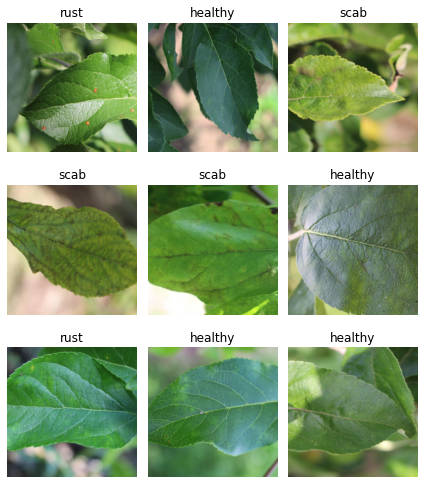

In [0]:
data.show_batch(rows = 3, figsize = (6,7))

In [0]:
learn = cnn_learner(data ,models.resnet34 , metrics = error_rate )

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
import torch
print(torch.__version__)
print(torch.cuda.device(0))
torch.cuda.empty_cache()
torch.cuda.is_available()

use_cuda = True
print(torch.cuda.is_available())

1.4.0
True


In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.123323,0.609550,0.167582,02:11
1,0.740578,0.554402,0.156593,02:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


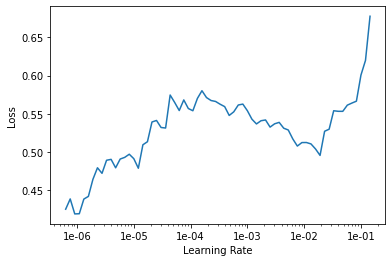

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(5e-4,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.629045,1.092826,0.123626,02:10
1,0.516129,0.489416,0.123626,02:11
2,0.378540,0.248244,0.057692,02:12
3,0.270745,0.221508,0.052198,02:11
4,0.215274,0.199763,0.049451,02:12


In [0]:
learn.save('stage-1-2')

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.167666,0.194980,0.046703,02:11
1,0.149964,0.196232,0.052198,02:12
2,0.136245,0.194280,0.049451,02:11


In [0]:
learn.save('stage-1-3')

In [0]:
learn.load('stage-1-3')

In [0]:
learn.fit_one_cycle(3, max_lr=slice(5e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.154201,0.219805,0.060440,02:13
1,0.142481,0.186793,0.038462,02:13
2,0.128050,0.181581,0.046703,02:14


In [0]:
learn.save('stage-1-2')

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.183128,0.196751,0.052198,02:10
1,0.154073,0.195958,0.060440,02:11
2,0.121011,0.195257,0.054945,02:11


In [0]:
learn.save('stage-1-4')

In [0]:
learn.load('stage-1-2');

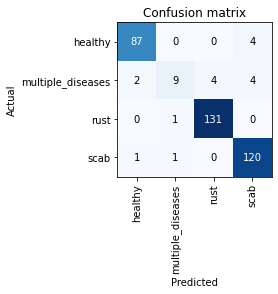

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

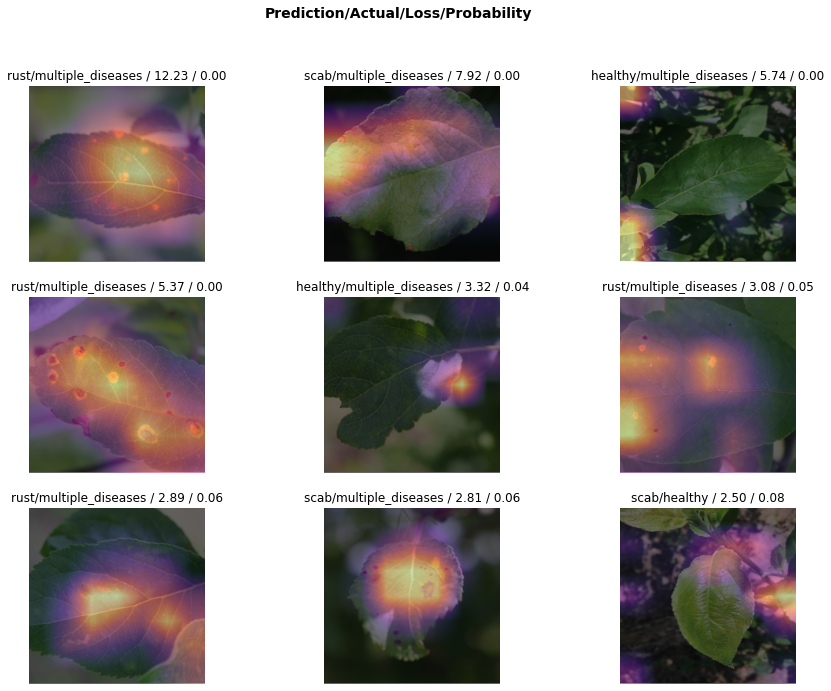

In [0]:
interp.plot_top_losses(9, figsize=(15,11) , heatmap = True)

In [0]:
learn1 = cnn_learner(data ,models.resnet50 , metrics = error_rate )

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn1.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.050968,0.594634,0.156593,02:13
1,0.691404,0.455627,0.134615,02:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


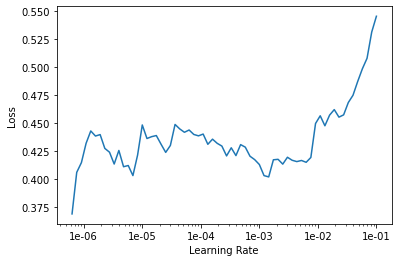

In [0]:
learn1.lr_find()
learn1.recorder.plot()

In [0]:
learn1.unfreeze()
learn1.fit_one_cycle(5, max_lr=slice(5e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.433363,0.389579,0.107143,02:14
1,0.389856,0.465501,0.109890,02:14
2,0.287042,0.385577,0.063187,02:15
3,0.185314,0.257360,0.068681,02:15
4,0.138151,0.267991,0.057692,02:15


In [0]:
learn1.save('stage-1-1')

In [0]:
learn1.fit_one_cycle(3, max_lr=slice(5e-6,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.091536,0.323192,0.076923,02:15
1,0.098687,0.276828,0.063187,02:13
2,0.080821,0.279188,0.057692,02:15


In [0]:
learn1.save('stage-1-2')

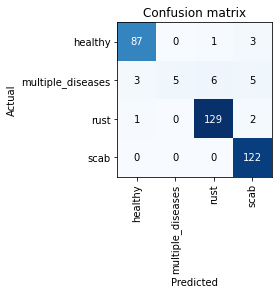

In [0]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

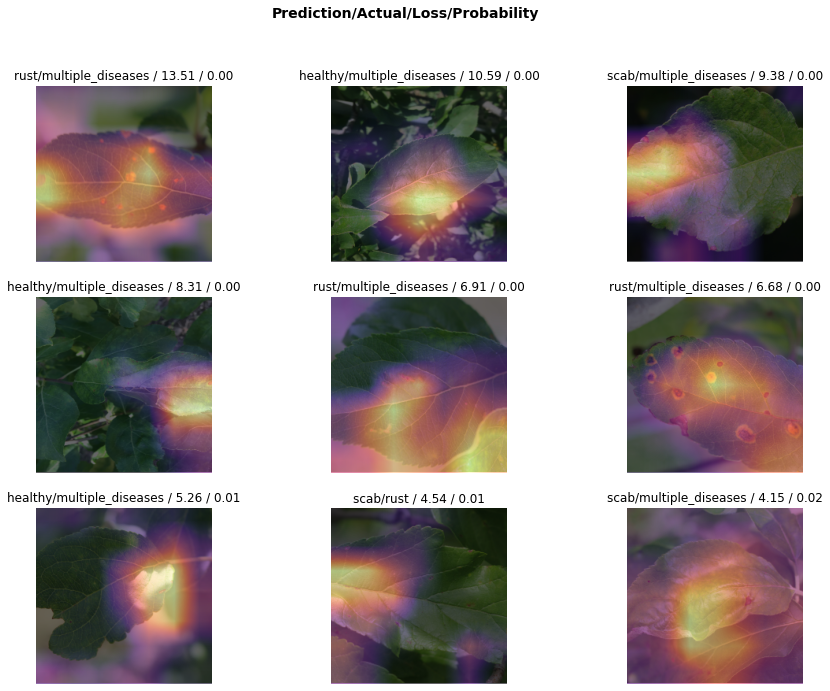

In [0]:
interp.plot_top_losses(9, figsize=(15,11) , heatmap = True)

In [0]:
learn2 = cnn_learner(data ,models.densenet121 , metrics = error_rate )

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


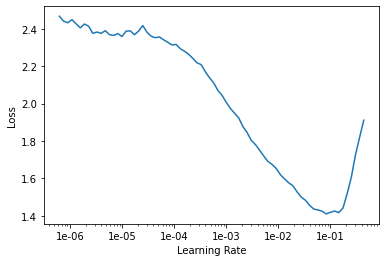

In [0]:
learn2.lr_find()
learn2.recorder.plot()

In [0]:
learn2.unfreeze()

In [0]:
learn2.fit_one_cycle(5, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.992936,0.482857,0.134615,02:17
1,0.668547,0.414526,0.093407,02:15
2,0.415534,0.339437,0.087912,02:16
3,0.290474,0.293118,0.063187,02:15
4,0.191032,0.276537,0.068681,02:16


In [0]:
learn2.save('model-1-1')

In [0]:
learn2.fit_one_cycle(3, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.116994,0.267121,0.057692,02:14
1,0.136222,0.299664,0.049451,02:15
2,0.105751,0.261780,0.060440,02:14


In [0]:
learn2.load('model-1-1')

In [0]:
learn2.fit_one_cycle(3, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.127168,0.254867,0.065934,02:14
1,0.097981,0.232887,0.054945,02:14
2,0.094553,0.249845,0.065934,02:14


In [0]:
learn2.save('model-1-2')

In [0]:
learn2.load('model-1-2');

In [0]:
learn.load('stage-1-2');

In [0]:
preds, y = learn2.get_preds(DatasetType.Test)
preds_np = preds.numpy()
px = pd.DataFrame(preds_np)

In [0]:
'''
learn.export()
learner = load_learner(path, test=ImageList.from_df(path = path ,df =testdf ,folder = 'images', suffix= '.jpg'))

In [0]:
submit = pd.read_csv(path/"sample_submission.csv")
submit.healthy = px[0]
submit.multiple_diseases = px[1]
submit.rust = px[2]
submit.scab = px[3]
print(submit.head())

  image_id       healthy  multiple_diseases          rust          scab
0   Test_0  4.858266e-05       1.128531e-02  9.886621e-01  4.063790e-06
1   Test_1  1.711826e-06       3.187805e-03  9.968070e-01  3.539647e-06
2   Test_2  5.561807e-07       1.776970e-06  9.276514e-10  9.999976e-01
3   Test_3  9.998671e-01       7.544549e-07  1.273672e-04  4.726576e-06
4   Test_4  4.505542e-10       2.424056e-06  9.999976e-01  5.932939e-10


In [0]:
submit.to_csv(path/"submission1.csv", index = False)